## **SteamGame Vectorization (CountVect and TDIDF)**

---



---



Import the libraries and fetch the cleaned dataset.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
df = pd.read_csv("/content/drive/My Drive/dataset/SteamGamesClean.csv")

In [52]:
df

,Unnamed: 0,title,user_review,user_suggestion,user_review_language,user_review_clean
0,0,Spooky's Jump Scare Mansion,I'm scared and hearing creepy voices. So I'll...,1,en,scared hearing creepy voices pause moment writ...
1,1,Spooky's Jump Scare Mansion,"Best game, more better than Sam Pepper's YouTu...",1,en,best game better sam pepper tube account need ...
2,2,Spooky's Jump Scare Mansion,"A littly iffy on the controls, but once you kn...",1,en,littly iffy controls know play easy master mad...
3,3,Spooky's Jump Scare Mansion,"Great game, fun and colorful and all that.A si...",1,en,great game fun colorful side note though getti...
4,4,Spooky's Jump Scare Mansion,Not many games have the cute tag right next to...,1,en,many games cute tag right next horror tag stea...
...,...,...,...,...,...,...
17276,17276,EverQuest II,Arguably the single greatest mmorp that exists...,1,en,arguably single greatest mmorp exists today fr...
17277,17277,EverQuest II,"An older game, to be sure, but has its own cha...",1,en,older game sure charm holds special place hear...
17278,17278,EverQuest II,When I frist started playing Everquest 2 it wa...,1,en,frist started playing everquest amazing still ...
17279,17279,EverQuest II,cool game. THe only thing that REALLY PISSES M...,1,en,cool game thing really pisses ridable transpor...


**Vectorizing the reviews**

Now the problem of making sense of text to our machine learning comes. Normally when we have categorical labels we use LabelEncoding, One-Hot Encoding to encode the strings to numbers, but when we have full-blown text with no common occurences, what can we do?

There are multiple methods to handing text. Two such methods are :

1. CountVectorizer
2. TFIDFVectorizer

### **1. CountVectorizer**

---



Understanding the concept

The idea here is very simple. It is similar to One-Hot Encoding of categorical veriables.In this method we create N features where N = (number of words in vocab). Here vocab is the set of all unique words in reviews. And the value in the feature created is the count of the word in the particular review.

The vocabulary is the index is assigned to each word.

---



In [0]:
#Import necessary packages for Count Vectorization

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

In [54]:
#cleaned user reviews 

clean_text = df['user_review_clean'].values
clean_text

array(['scared hearing creepy voices pause moment write review wait heart beat return atleast somewhat calmer times game adorable creepy like happy tree friends graphics sceme childhood bubble clean hello charactes isnot trying kill likable bit odd noob things though oh look class room full ghosts dead children lets shine flashlight stand staring hmm creepy music turn around see see chasing never game afraid finding locked door',
       'best game better sam pepper tube account need play computer extra pants pros scary hell fun adventure spooky forgot mention scary hell get pants briefs wardrobe time consuming bored cons buying pants briefs downloaded yet',
       'littly iffy controls know play easy master made floor due certain circumstances unable finish game related worry bug glitch antyhing highly recommend casual play maybe friend two watching hilarity ensues especially hit floor fun fellow fleshlings',
       ...,
       'frist started playing everquest amazing still great playe

In [55]:
# check target

target = df['user_suggestion'].values
target

array([1, 1, 1, ..., 1, 1, 1])

In [56]:
# tokenize and build vocab
vect = CountVectorizer()
vect.fit(clean_text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [57]:
#view vocabulary

vect.vocabulary_

{'scared': 31996,
 'hearing': 16974,
 'creepy': 8096,
 'voices': 40147,
 'pause': 26467,
 'moment': 23434,
 'write': 41422,
 'review': 30977,
 'wait': 40295,
 'heart': 16977,
 'beat': 3469,
 'return': 30918,
 'atleast': 2498,
 'somewhat': 34041,
 'calmer': 5192,
 'times': 37364,
 'game': 14973,
 'adorable': 640,
 'like': 21079,
 'happy': 16705,
 'tree': 37990,
 'friends': 14595,
 'graphics': 16009,
 'sceme': 32026,
 'childhood': 6022,
 'bubble': 4814,
 'clean': 6317,
 'hello': 17092,
 'charactes': 5835,
 'isnot': 19456,
 'trying': 38197,
 'kill': 20174,
 'likable': 21078,
 'bit': 3955,
 'odd': 25081,
 'noob': 24615,
 'things': 37042,
 'though': 37121,
 'oh': 25185,
 'look': 21438,
 'class': 6284,
 'room': 31409,
 'full': 14741,
 'ghosts': 15467,
 'dead': 8804,
 'children': 6028,
 'lets': 20926,
 'shine': 32813,
 'flashlight': 13910,
 'stand': 34843,
 'staring': 34886,
 'hmm': 17386,
 'music': 23927,
 'turn': 38294,
 'around': 2145,
 'see': 32314,
 'chasing': 5880,
 'never': 24373,
 'af

In [0]:
#split the data using train_test_split with test_size = 0.2

X_train, X_valid, y_train, y_valid = train_test_split(clean_text, target, test_size=0.2)

In [59]:
# encode document

train_count_vect = vect.transform(X_train)
test_count_vect = vect.transform(X_valid)

print("Number of features / words in vocab : {}".format(len(vect.get_feature_names())))

Number of features / words in vocab : 41946


As the feature set is huge (41946) it is better if we fit smaller and faster models to evaluate our data.

To limit the number of features we can use max_features to set the maximum number of features we want.



In [0]:
vect = CountVectorizer(max_features=5000)

**Evaluating our data**

---



In [0]:
train_acc = []
val_acc = []
model = []

**1.  Logistic Regression**

In [71]:
model = LogisticRegression()
model.fit(train_count_vect, y_train)

train_score = accuracy_score(y_train, model.predict(train_count_vect))
valid_score = accuracy_score(y_valid, model.predict(test_count_vect))
train_acc.append(train_score)
val_acc.append(valid_score)
print("Train Score : {}\nValid Score : {}".format(train_score, valid_score))

Train Score : 0.9867621527777778
Valid Score : 0.835406421752965


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


**2.  K Neighbors Classifier**


In [72]:
model = KNeighborsClassifier(4)
model.fit(train_count_vect, y_train)

train_score = accuracy_score(y_train, model.predict(train_count_vect))
valid_score = accuracy_score(y_valid, model.predict(test_count_vect))
train_acc.append(train_score)
val_acc.append(valid_score)
print("Train Score : {}\nValid Score : {}".format(train_score, valid_score))

Train Score : 0.7928240740740741
Valid Score : 0.6068845820075209


**1. Logistic Regression**

Train Score : 0.9861834490740741

Valid Score : 0.8316459357824704

---



**2. KNN**

Train Score : 0.7491319444444444

Valid Score : 0.6340757882557131

---


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  


Text(0.5, 1.0, 'Classifier Accuracies')

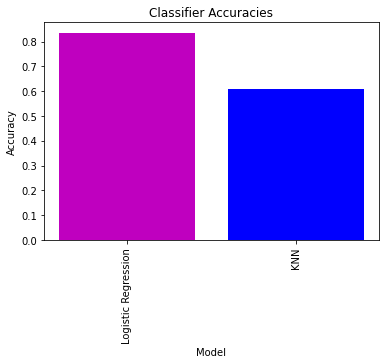

In [144]:
#plot accuracy

index= [0,1]
plt.bar(index ,val_acc,color='mb')
plt.xticks(index, labels=["Logistic Regression", "KNN"],rotation=90)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Classifier Accuracies')



### **2.  TfidfVectorizer**

---



So a common question might be that count can't be a significance of how important a feature is.

In a review word "a", "are", etc can occur many times, but doesn't add to semantic meaning of the review?

But words like "good", "bad" can occur less frequently but has a great influence of the sentiment of the review.

We can score the relative importance of words using the strategy TF-IDF (Term Frequecy | Inverse Document Frequency).

---

Simple Example :

Consider a document containing 100 words wherein the word cat appears 3 times.

The term frequency (i.e., tf) for cat is then (3 / 100) = 0.03.

Now, assume we have 10 million documents and the word cat appears in one thousand of these.Then, the inverse document frequency (i.e., idf) is calculated as log(10,000,000 / 1,000) = 4.

Thus, the Tf-idf weight is the product of these quantities: 0.03 * 4 = 0.12.

In [0]:
#import necessary packages

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import tensorflow as tf
from tensorflow import keras  

In [76]:
tfidf_vectorizer = TfidfVectorizer(analyzer ='word',)

# tokenize and build vocab

tfidf_vectorizer.fit(clean_text)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [0]:
#split the dataset into train and validation dataset
# encode document
X_train, X_valid, y_train, y_valid = train_test_split(clean_text, target, test_size=0.2)

xtrain_vect1 = tfidf_vectorizer.transform(X_train)
xtest_vect1 = tfidf_vectorizer.transform(X_valid)

In [0]:
#perform linear dimensionality reduction by means of truncated singular value decomposition (SVD)

tsvd = TruncatedSVD(n_components=30)

xtrain_scaled = tsvd.fit_transform(xtrain_vect1)
xtest_scaled = tsvd.fit_transform(xtest_vect1)

In [0]:
# defining the sequential model with input shape

model = keras.models.Sequential([
        keras.layers.Dense(40, input_shape=[30,], activation='relu'),
        keras.layers.Dense(20, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
]) 

In [0]:
model.compile(optimizer=keras.optimizers.Adam(0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [146]:
# Train the model and benchmark against validation data

model.fit(xtrain_scaled, y_train, epochs=15, verbose=2, validation_split=0.3)

Epoch 1/15
303/303 - 0s - loss: 0.3671 - accuracy: 0.8365 - val_loss: 0.4294 - val_accuracy: 0.8050
Epoch 2/15
303/303 - 1s - loss: 0.3661 - accuracy: 0.8362 - val_loss: 0.4245 - val_accuracy: 0.8127
Epoch 3/15
303/303 - 0s - loss: 0.3651 - accuracy: 0.8361 - val_loss: 0.4228 - val_accuracy: 0.8110
Epoch 4/15
303/303 - 0s - loss: 0.3652 - accuracy: 0.8379 - val_loss: 0.4282 - val_accuracy: 0.8124
Epoch 5/15
303/303 - 0s - loss: 0.3637 - accuracy: 0.8355 - val_loss: 0.4243 - val_accuracy: 0.8091
Epoch 6/15
303/303 - 0s - loss: 0.3625 - accuracy: 0.8391 - val_loss: 0.4260 - val_accuracy: 0.8071
Epoch 7/15
303/303 - 0s - loss: 0.3620 - accuracy: 0.8390 - val_loss: 0.4253 - val_accuracy: 0.8095
Epoch 8/15
303/303 - 0s - loss: 0.3622 - accuracy: 0.8389 - val_loss: 0.4262 - val_accuracy: 0.8062
Epoch 9/15
303/303 - 0s - loss: 0.3605 - accuracy: 0.8409 - val_loss: 0.4260 - val_accuracy: 0.8086
Epoch 10/15
303/303 - 0s - loss: 0.3587 - accuracy: 0.8403 - val_loss: 0.4360 - val_accuracy: 0.8108

In [0]:
epoch = model.history.epoch
history = model.history.history

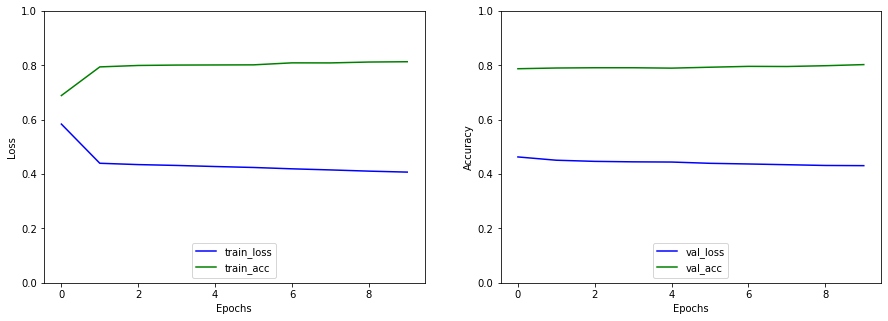

In [147]:
# Plot Accuracy

plt.figure(figsize=(15,5))

plt.subplot(121)
plt.ylim([0.0, 1.0])
plt.plot(epoch, history['loss'], 'b', epoch, history['accuracy'], 'g')
plt.legend(['train_loss', 'train_acc'], loc='lower center')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(122)
plt.ylim([0.0, 1.0])
plt.plot(epoch, history['val_loss'], 'b', epoch, history['val_accuracy'], 'g')
plt.legend(['val_loss', 'val_acc'], loc ='lower center')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

We can see that our accuracy has increased from 63.4% (CountVect -KNN) to 81.10% (TF-IDF Vect) and remains almost same as (CountVect- LogReg) 83.16%

Usually TF-IDF is a better and intelligent method, but it has its own limitations.

Some of the limitations are :

1. As TF-IDF and CountVect are methods built on frequencies of words, they do not capture-position in text (whether the word is in starting, end, between any words, and most importantly the CONTEXT), semantics (CONTEXT), co-occurrences in different documents.

2. Cannot capture semantics (e.g. as compared to topic models, word embeddings, etc)